create two separate customer segmentations (using clustering) to split them into 3-5 clusters:
  -  based on demographics (only on the information from twm_customer)
  -  based on their banking behavior. We can take following things into consideration as banking behavior:
        1. do they have savings account? How much do they save? 
        2. do they have credit account? How much do they live in debt?
        3. are they making lot of small transactions or few huge ones?
  2.  visualize the created clusters using radar charts and compare them agains each other
  3.  visualize segmentations using scatter plot. We will have to use PCA to be able to plot our observations in 2D.
  4. (stretch) visualize in 2D how our clusters are evolving in each iteration of KMeans (for at least 20 iterations).
we will need to create own implementation of kmeans so we can see what is happening with the clusters during the iterations.

In [79]:
import pandas as pd
import plotly.express as px
from sklearn.decomposition import PCA
import re
from sklearn import preprocessing
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [12]:
cust_data = pd.read_csv('twm_customer.csv', sep=';')
check_data = pd.read_csv('twm_checking_acct.csv', sep=';')
saving_data = pd.read_csv('twm_savings_acct.csv', sep=';')
credit_data = pd.read_csv('twm_credit_acct.csv', sep=';')
trans_data = pd.read_csv('twm_transactions.csv', sep=';')
acc_data = pd.read_csv('twm_accounts.csv', sep=';')
checktrans_data = pd.read_csv('twm_checking_tran.csv', sep=';')

In [240]:
credit_data1 = pd.read_csv('twm_credit_acct.csv', sep=';')
credit_data1

,cust_id,acct_nbr,credit_limit,credit_rating,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance
0,1363160,4561143213631600,1000,0,Y,12.10.1988,NaN,657.46,286.69
1,1362487,4561143213624870,3000,0,Y,8.8.1995,NaN,0.00,1548.23
2,1362548,4561143213625480,6700,0,Y,11.11.1986,NaN,6965.25,68.68
3,1362752,4561143213627520,2400,0,N,9.10.1994,2.4.1995,2302.14,0.00
4,1363017,4561143213630170,1000,0,Y,8.2.1995,NaN,0.00,1000.00
...,...,...,...,...,...,...,...,...,...
463,1363364,4561143213633640,3000,0,N,23.11.1989,23.7.1995,1783.86,1785.97
464,1363467,4561143213634670,1500,0,Y,30.6.1993,NaN,1193.89,1500.00
465,1363263,4561143213632630,3000,0,Y,29.3.1995,NaN,0.00,1218.94
466,1362569,4561143213625690,9200,0,Y,6.12.1995,NaN,0.00,9200.00


In [171]:
saving_data = saving_data[['cust_id','acct_nbr','ending_balance']]

In [173]:
credit_data = credit_data[['cust_id','acct_nbr','ending_balance']]

In [182]:
cust_data
#cluster by income using: age, martial_status, nbr_children, years_with_bank

,cust_id,income,age,years_with_bank,nbr_children,gender,marital_status,name_prefix,first_name,last_name,street_nbr,street_name,postal_code,city_name,state_code,gender_code
0,1362691,26150,46,5,1,M,2,,Donald ...,Marek ...,8298,Second ...,89194,Las Vegas,NV,1
1,1362487,6605,71,1,0,M,2,,ChingDyi ...,Moussavi ...,10603,Daffodil ...,90159,Los Angeles,CA,1
2,1363160,18548,38,8,0,F,1,,Rosa ...,Johnston ...,8817,Figueroa ...,90024,Los Angeles,CA,0
3,1362752,47668,54,3,0,F,1,,Lisa ...,Martin ...,676,Humble ...,90172,Los Angeles,CA,0
4,1362548,44554,59,9,2,F,4,,Barbara ...,O'Malley ...,6578,C ...,10138,New York City,NY,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
742,1363324,14795,36,6,1,F,4,,Lillian ...,Kaufman ...,9677,B ...,90016,Los Angeles,CA,0
743,1362895,26387,56,6,1,M,2,,Marty ...,McSherry ...,3227,Inspiration ...,10126,New York City,NY,1
744,1362569,61300,50,0,2,M,2,,Ken ...,Lawrence ...,6082,23rd ...,87194,Albuquerque,NM,1
745,1363364,15100,37,7,0,F,2,,Debbie ...,Runner ...,7851,H ...,35241,Birmingham,AL,0


In [174]:
cust_data['gender_code'] = pd.Series.apply(cust_data['gender'],gender)

In [176]:
randf = cust_data.copy()
randf.columns.tolist()

['cust_id',
 'income',
 'age',
 'years_with_bank',
 'nbr_children',
 'gender',
 'marital_status',
 'name_prefix',
 'first_name',
 'last_name',
 'street_nbr',
 'street_name',
 'postal_code',
 'city_name',
 'state_code',
 'gender_code']

In [177]:
randf.drop(columns=['name_prefix',
 'first_name',
 'last_name',
 'street_nbr',
 'street_name',
 'postal_code',
 'city_name',],inplace=True)

In [183]:
randf1 = pd.merge(randf,saving_data,how='outer',on='cust_id')

In [185]:
randf2 = pd.merge(randf1,credit_data,how='outer',on='cust_id')

In [187]:
randf2.describe()

,cust_id,income,age,years_with_bank,nbr_children,marital_status,gender_code,acct_nbr_x,ending_balance_x,acct_nbr_y,ending_balance_y
count,7.470000e+02,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,4.210000e+02,421.000000,4.680000e+02,468.000000
mean,1.362991e+06,22728.281124,42.479250,3.907631,0.714859,1.882195,0.440428,1.362988e+07,1258.060736,4.561143e+15,1184.885662
std,2.925255e+02,22207.221405,19.114879,2.675634,1.103410,0.892051,0.496771,2.951807e+03,2054.680311,2.920717e+03,1363.065314
min,1.362480e+06,0.000000,13.000000,0.000000,0.000000,1.000000,0.000000,1.362480e+07,2.740000,4.561143e+15,0.000000
25%,1.362732e+06,7118.500000,28.000000,2.000000,0.000000,1.000000,0.000000,1.362722e+07,254.020000,4.561143e+15,353.187500
50%,1.362993e+06,17242.000000,42.000000,4.000000,0.000000,2.000000,0.000000,1.362980e+07,619.050000,4.561143e+15,1000.000000
75%,1.363244e+06,31338.000000,56.000000,6.000000,1.000000,2.000000,1.000000,1.363253e+07,1535.830000,4.561143e+15,1358.717500
max,1.363495e+06,144157.000000,89.000000,9.000000,5.000000,4.000000,1.000000,1.363495e+07,22432.780000,4.561143e+15,9500.000000


In [14]:
cust1 = cust_data[['income', 'age', 'gender', 'marital_status', 'state_code']]

In [15]:
scaler = StandardScaler()

In [16]:
cust2 = cust_data[['income', 'age', 'years_with_bank', 'nbr_children', 'marital_status']]

scaled_cust2 = scaler.fit_transform(cust2)
columns = cust2.columns
df_cust2 = pd.DataFrame(scaled_cust2, columns=columns)

In [17]:
#new scaled and filtered data
df_cust2

,income,age,years_with_bank,nbr_children,marital_status
0,0.154185,0.184312,0.408539,0.258591,0.132149
1,-0.726524,1.493070,-1.087435,-0.648298,0.132149
2,-0.188366,-0.234490,1.530520,-0.648298,-0.989614
3,1.123798,0.603115,-0.339448,-0.648298,-0.989614
4,0.983479,0.864867,1.904514,1.165479,2.375675
...,...,...,...,...,...
742,-0.357478,-0.339191,0.782533,0.258591,2.375675
743,0.164864,0.707816,0.782533,0.258591,0.132149
744,1.738064,0.393714,-1.461429,1.165479,0.132149
745,-0.343735,-0.286841,1.156526,-0.648298,0.132149


In [18]:
def gender(x):
    if x == 'M ':
        return 1
    else:
        return 0
cust1['gender_code'] = pd.Series.apply(cust1['gender'],gender)

<ipython-input-18-bc4c3828734f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cust1['gender_code'] = pd.Series.apply(cust1['gender'],gender)


In [19]:
cust1 = cust1.drop(columns='gender')

In [26]:
sc = cust1['state_code'].sort_values().unique()
sc

array(['AL', 'AZ', 'CA', 'CO', 'DC', 'FL', 'GA', 'HI', 'IL', 'IN', 'KS',
       'KY', 'LA', 'MA', 'MD', 'MI', 'MN', 'MO', 'NB', 'NC', 'NJ', 'NM',
       'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'TN', 'TX', 'VA', 'WA', 'WI'],
      dtype=object)

In [25]:
def regex(line):
    updated_string = re.sub("\s.", "", line)
    return updated_string
cust1['state_code'] = pd.Series.apply(cust1['state_code'],regex)

In [32]:
cust1.replace({"state_code": y}, inplace=True)

In [ ]:
#cleaned and prepped data
cust1

In [27]:
sc

array(['AL', 'AZ', 'CA', 'CO', 'DC', 'FL', 'GA', 'HI', 'IL', 'IN', 'KS',
       'KY', 'LA', 'MA', 'MD', 'MI', 'MN', 'MO', 'NB', 'NC', 'NJ', 'NM',
       'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'TN', 'TX', 'VA', 'WA', 'WI'],
      dtype=object)

In [29]:
emp_list = []

In [30]:
for i, x in enumerate(sc):
    emp_list.append((x, i))

In [31]:
y = dict(emp_list)

In [33]:
scaler = StandardScaler()
scaled_cust1 = scaler.fit_transform(cust1)

In [34]:
columns=cust1.columns

In [35]:
df_cust1 = pd.DataFrame(scaled_cust1, columns=columns)

In [55]:
X

,income,age,marital_status
0,0.154185,0.184312,0.132149
1,-0.726524,1.493070,0.132149
2,-0.188366,-0.234490,-0.989614
3,1.123798,0.603115,-0.989614
4,0.983479,0.864867,2.375675
...,...,...,...
742,-0.357478,-0.339191,2.375675
743,0.164864,0.707816,0.132149
744,1.738064,0.393714,0.132149
745,-0.343735,-0.286841,0.132149


In [54]:
X = df_cust1.drop(columns=['state_code','gender_code'])

## A particular version 

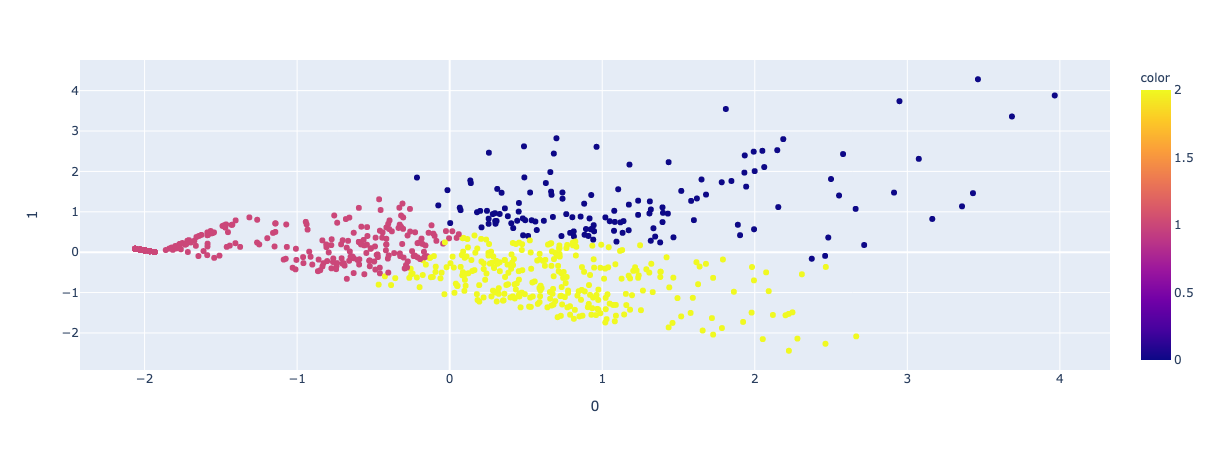

In [67]:

km = KMeans(n_clusters=3,
            n_init=3)
pca = PCA(n_components=3)
components = pca.fit_transform(X)
y_km = km.fit_predict(components)




fig = px.scatter(components, x=0, y=1, color=y_km)
fig.show()

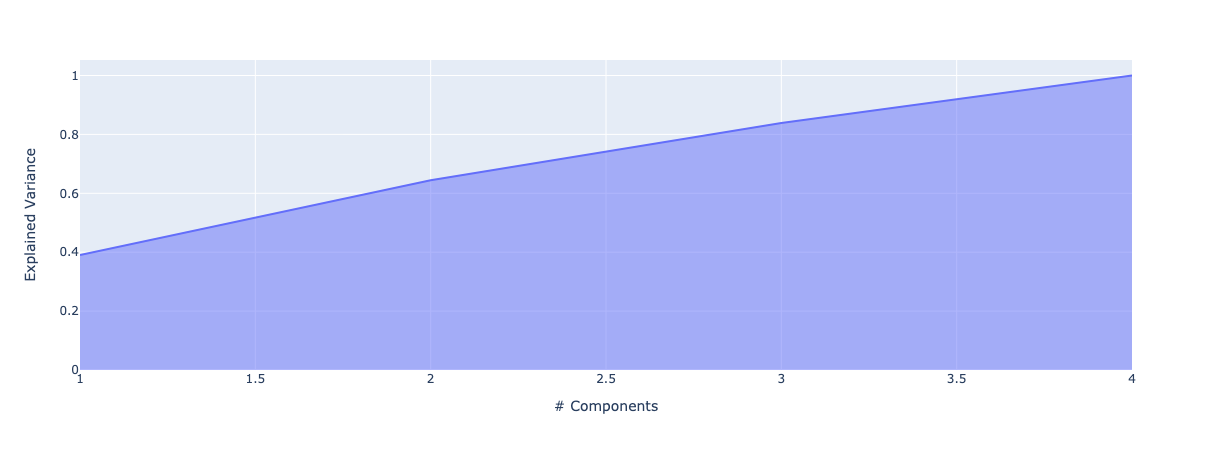

In [49]:
pca = PCA()
pca.fit(X)
exp_var_cumul = np.cumsum(pca.explained_variance_ratio_)

px.area(
    x=range(1, exp_var_cumul.shape[0] + 1),
    y=exp_var_cumul,
    labels={"x": "# Components", "y": "Explained Variance"}
)

In [50]:
def plot_clusters(X,y_res, plt_cluster_centers = False):
    X_centroids = []
    Y_centroids = []
    plt.figure(figsize=(12,9))

    for cluster in set(y_res):
        x = X[y_res == cluster,0]
        y = X[y_res == cluster,1]
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))

        plt.scatter(x,
                    y,
                    s=25,
                    marker='o',
                    label=f'cluster {cluster}')

    if plt_cluster_centers:
        plt.scatter(X_centroids,
                    Y_centroids,
                    marker='*',
                    c='red',
                    s=250,
                    label='centroids')
    plt.legend()
    plt.grid()
    plt.show()

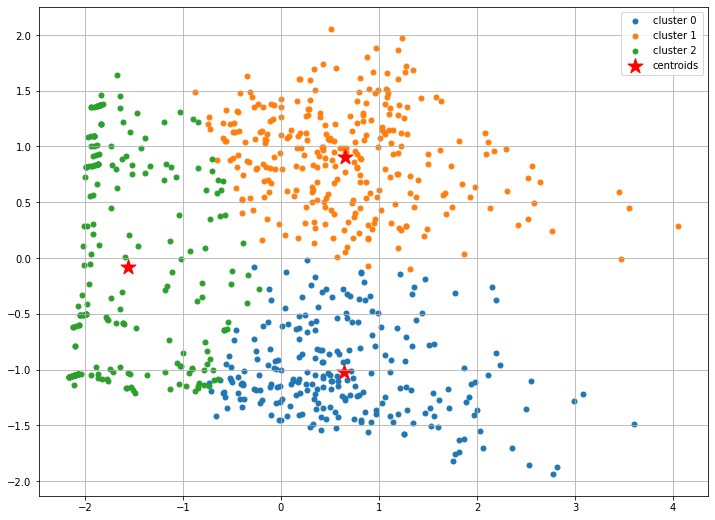

In [51]:
plot_clusters(components, y_km, plt_cluster_centers=True)

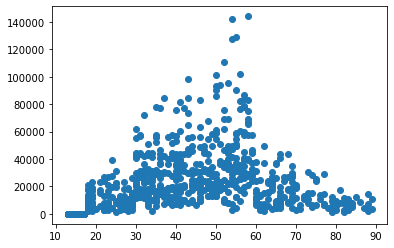

In [63]:
plt.scatter(cust2['age'],cust2['income'])
plt.show()

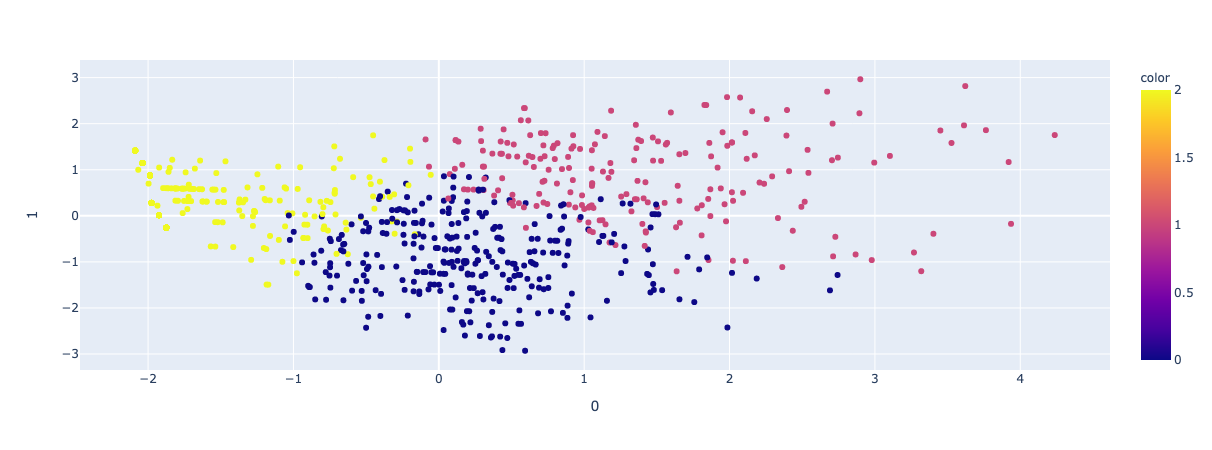

In [68]:
km = KMeans(n_clusters=3,
            n_init=30)
pca = PCA(n_components=3)
components = pca.fit_transform(df_cust2)
y_km = km.fit_predict(components)




fig = px.scatter(components, x=0, y=1, color=y_km)
fig.show()

#### This is with df_cust2, this is what we used with StandardScaling and didn't llike what we got

In [70]:
df_cust2['clusters'] = y_km

In [72]:
df0 = df_cust2[df_cust2['clusters'] == 0]
df1 = df_cust2[df_cust2['clusters'] == 1]
df2 = df_cust2[df_cust2['clusters'] == 2]

## Experiment

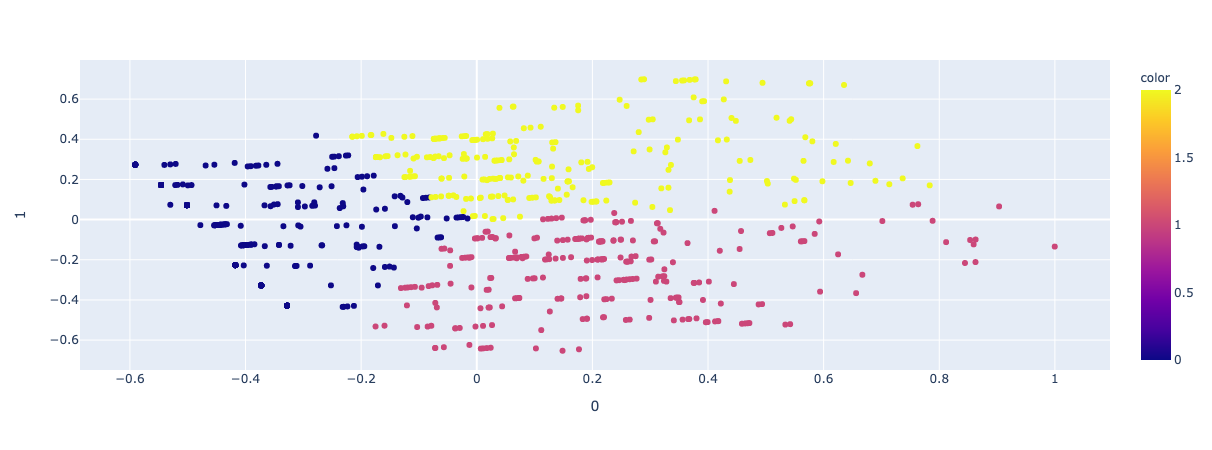

In [110]:
z = cust_data[['income', 'age', 'years_with_bank','marital_status']]

q = MinMaxScaler().fit_transform(z)
columns = z.columns
df = pd.DataFrame(q, columns=columns)

km = KMeans(n_clusters=3,
            n_init=30)
pca = PCA(n_components=3)
comp = pca.fit_transform(df)
y1km = km.fit_predict(comp)




fig = px.scatter(comp, x=0, y=1, color=y1km)
fig.show()

In [105]:
z['clusters'] = y1km

z0 = z[z['clusters'] == 0]
z1 = z[z['clusters'] == 1]
z2 = z[z['clusters'] == 2]

<ipython-input-105-632ce733b76f>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [106]:
z0.describe()

,income,age,years_with_bank,marital_status,clusters
count,240.000000,240.000000,240.000000,240.000000,240.0
mean,29567.920833,48.179167,1.870833,2.579167,0.0
std,23455.695034,14.797277,1.551077,0.844613,0.0
min,1565.000000,22.000000,0.000000,1.000000,0.0
25%,12454.250000,35.000000,0.000000,2.000000,0.0
50%,22739.500000,50.000000,2.000000,2.000000,0.0
75%,41358.250000,55.000000,3.000000,3.000000,0.0
max,142274.000000,83.000000,6.000000,4.000000,0.0


In [107]:
z1.describe()

,income,age,years_with_bank,marital_status,clusters
count,255.000000,255.00000,255.000000,255.000000,255.0
mean,27767.870588,54.67451,6.627451,1.984314,1.0
std,22140.383065,15.10071,1.559335,0.715237,0.0
min,1039.000000,27.00000,3.000000,1.000000,1.0
25%,12052.500000,46.00000,5.000000,2.000000,1.0
50%,22437.000000,56.00000,6.000000,2.000000,1.0
75%,37026.500000,66.00000,8.000000,2.000000,1.0
max,144157.000000,89.00000,9.000000,4.000000,1.0


In [108]:
z2.describe()

,income,age,years_with_bank,marital_status,clusters
count,252.000000,252.000000,252.000000,252.000000,252.0
mean,11114.753968,24.710317,3.095238,1.115079,2.0
std,15487.488293,12.146820,2.093163,0.319753,0.0
min,0.000000,13.000000,0.000000,1.000000,2.0
25%,0.000000,16.000000,1.000000,1.000000,2.0
50%,5797.500000,19.000000,3.000000,1.000000,2.0
75%,17942.250000,32.250000,5.000000,1.000000,2.0
max,111004.000000,64.000000,7.000000,2.000000,2.0


## THIS IS THE MAIN STUFF 

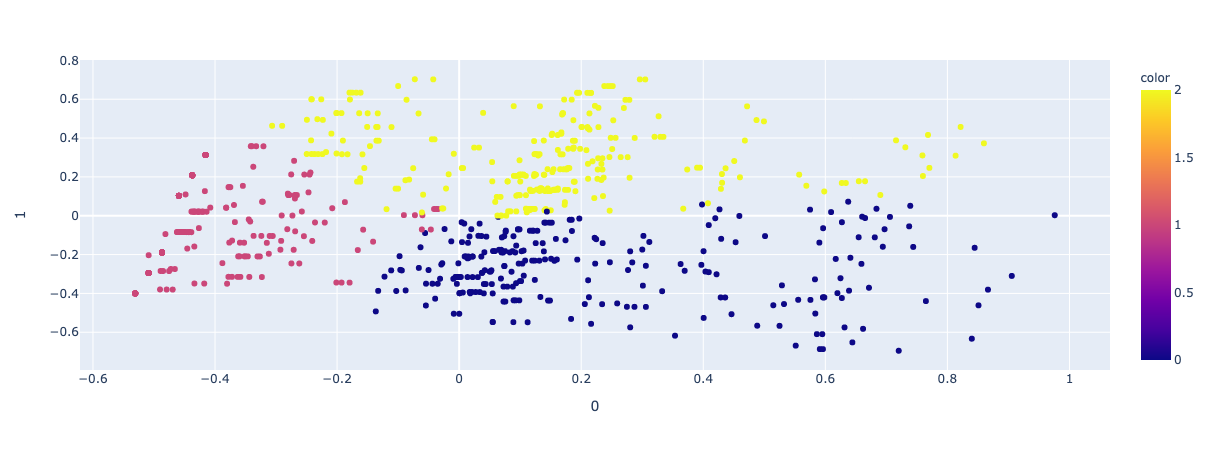

In [114]:
z = cust_data[['income', 'age', 'years_with_bank', 'nbr_children','marital_status']]

q = MinMaxScaler().fit_transform(z)
columns = z.columns
df = pd.DataFrame(q, columns=columns)

km = KMeans(n_clusters=3,
            n_init=30)
pca = PCA(n_components=3)
comp = pca.fit_transform(df)
y1km = km.fit_predict(comp)




fig = px.scatter(comp, x=0, y=1, color=y1km)
fig.show()

In [119]:
df['clusters'] = y1km

df0 = df[df['clusters'] == 0]
df1 = df[df['clusters'] == 1]
df2 = df[df['clusters'] == 2]

In [120]:
df

,income,age,years_with_bank,nbr_children,marital_status,clusters
0,0.181399,0.434211,0.555556,0.2,0.333333,2
1,0.045818,0.763158,0.111111,0.0,0.333333,0
2,0.128665,0.328947,0.888889,0.0,0.000000,2
3,0.330667,0.539474,0.333333,0.0,0.000000,1
4,0.309066,0.605263,1.000000,0.4,1.000000,2
...,...,...,...,...,...,...
742,0.102631,0.302632,0.666667,0.2,1.000000,0
743,0.183043,0.565789,0.666667,0.2,0.333333,2
744,0.425231,0.486842,0.000000,0.4,0.333333,0
745,0.104747,0.315789,0.777778,0.0,0.333333,2


In [115]:
z['clusters'] = y1km

z0 = z[z['clusters'] == 0]
z1 = z[z['clusters'] == 1]
z2 = z[z['clusters'] == 2]

<ipython-input-115-632ce733b76f>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [116]:
z0.describe()

,income,age,years_with_bank,nbr_children,marital_status,clusters
count,247.000000,247.000000,247.000000,247.000000,247.000000,247.0
mean,29775.068826,45.194332,1.955466,1.465587,2.578947,0.0
std,23270.089473,14.231631,1.665662,1.305799,0.831813,0.0
min,1565.000000,21.000000,0.000000,0.000000,2.000000,0.0
25%,12612.000000,33.000000,1.000000,0.000000,2.000000,0.0
50%,24326.000000,43.000000,2.000000,1.000000,2.000000,0.0
75%,41455.500000,53.000000,3.000000,2.000000,3.000000,0.0
max,142274.000000,83.000000,7.000000,5.000000,4.000000,0.0


In [117]:
z1.describe()

,income,age,years_with_bank,nbr_children,marital_status,clusters
count,236.000000,236.000000,236.000000,236.000000,236.000000,236.0
mean,10901.211864,24.737288,3.114407,0.021186,1.050847,1.0
std,15824.491469,12.959464,2.145665,0.144312,0.220153,0.0
min,0.000000,13.000000,0.000000,0.000000,1.000000,1.0
25%,0.000000,15.000000,1.000000,0.000000,1.000000,1.0
50%,4362.000000,18.000000,3.000000,0.000000,1.000000,1.0
75%,17519.500000,32.000000,5.000000,0.000000,1.000000,1.0
max,111004.000000,80.000000,7.000000,1.000000,2.000000,1.0


In [118]:
z2.describe()

,income,age,years_with_bank,nbr_children,marital_status,clusters
count,264.000000,264.000000,264.000000,264.000000,264.000000,264.0
mean,26707.946970,55.799242,6.443182,0.632576,1.973485,2.0
std,21921.403237,15.145977,1.732213,0.933858,0.694395,0.0
min,1039.000000,27.000000,2.000000,0.000000,1.000000,2.0
25%,10677.750000,46.000000,5.000000,0.000000,2.000000,2.0
50%,20517.000000,56.500000,6.000000,0.000000,2.000000,2.0
75%,36276.750000,66.000000,8.000000,1.000000,2.000000,2.0
max,144157.000000,89.000000,9.000000,5.000000,4.000000,2.0


In [126]:
df.columns[0:5].tolist()

['income', 'age', 'years_with_bank', 'nbr_children', 'marital_status']

In [149]:
df1.describe()

,income,age,years_with_bank,nbr_children,marital_status,clusters
count,236.000000,236.000000,236.000000,236.000000,236.000000,236.0
mean,0.075620,0.154438,0.346045,0.004237,0.016949,1.0
std,0.109773,0.170519,0.238407,0.028862,0.073384,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,0.000000,0.026316,0.111111,0.000000,0.000000,1.0
50%,0.030259,0.065789,0.333333,0.000000,0.000000,1.0
75%,0.121531,0.250000,0.555556,0.000000,0.000000,1.0
max,0.770022,0.881579,0.777778,0.200000,0.333333,1.0


In [138]:
r0 = df0.mean().tolist()

r0.pop()

In [142]:
r1 = df1.mean().tolist()

r1.pop()

1.0

In [143]:
r2 = df2.mean().tolist()

r2.pop()

2.0

In [145]:
r1

[0.07562041291374531,
 0.15443800178412148,
 0.3460451977401134,
 0.00423728813559322,
 0.01694915254237288]

In [151]:
g = df.columns[0:5].tolist()

In [153]:
g = ['Income', 'Age', 'Years with the bank', 'Number of Children', 'Marital Status']

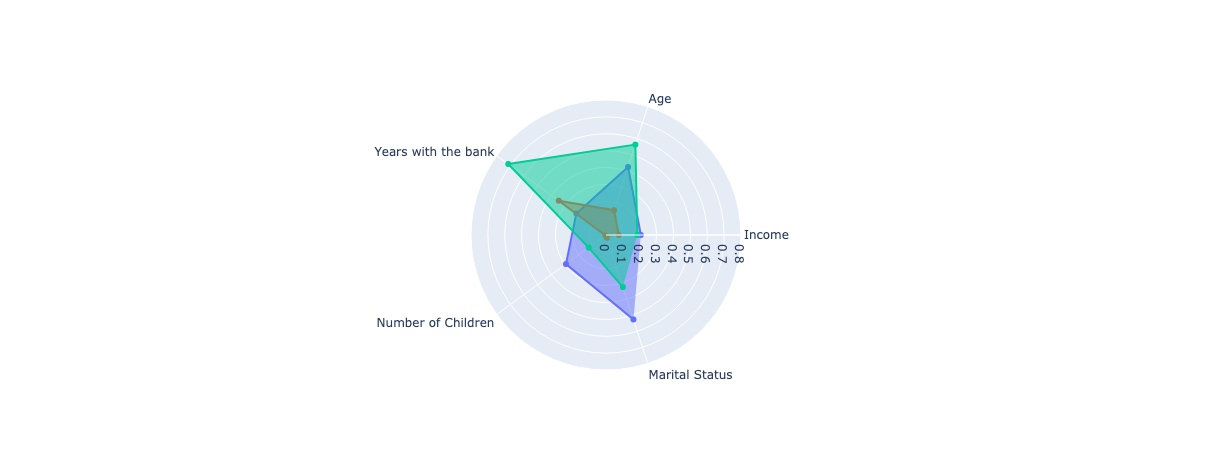

In [165]:
import plotly.graph_objects as go

categories = g

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=r0,
      theta=categories,
      fill='toself',
      name='Cluster 0'
))
fig.add_trace(go.Scatterpolar(
      r=r1,
      theta=categories,
      fill='toself',
      name='Cluster 1'
))

fig.add_trace(go.Scatterpolar(
      r=r2,
      theta=categories,
      fill='toself',
      name='Cluster 2'
))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 0.8]
    )),
  showlegend=False
)

fig.show()


## <span style="color:red">This is what we did as our radar chart for part 1 using means of each category</span>.

---------------------------------------------------------------------------------------------------------------------------------------------------------

## THIS IS THE MAIN STUFF PART 2

In [192]:
testdf = randf2.drop(columns=['acct_nbr_x','acct_nbr_y'])

In [193]:
testdf.fillna(value=0,inplace=True)

In [195]:
n = testdf.columns.tolist()

In [197]:
n = ['cust_id',
 'income',
 'age',
 'years_with_bank',
 'nbr_children',
 'gender',
 'marital_status',
 'state_code',
 'gender_code',
 'saving_amount',
 'credit_amount']

In [198]:
testdf.columns = n
testdf

,cust_id,income,age,years_with_bank,nbr_children,gender,marital_status,state_code,gender_code,saving_amount,credit_amount
0,1362691,26150,46,5,1,M,2,NV,1,0.00,0.00
1,1362487,6605,71,1,0,M,2,CA,1,12.89,1548.23
2,1363160,18548,38,8,0,F,1,CA,0,122.54,286.69
3,1362752,47668,54,3,0,F,1,CA,0,609.33,0.00
4,1362548,44554,59,9,2,F,4,NY,0,254.02,68.68
...,...,...,...,...,...,...,...,...,...,...,...
742,1363324,14795,36,6,1,F,4,CA,0,0.00,0.00
743,1362895,26387,56,6,1,M,2,NY,1,96.25,1300.00
744,1362569,61300,50,0,2,M,2,NM,1,0.00,9200.00
745,1363364,15100,37,7,0,F,2,AL,0,0.00,1785.97


 'age', 'years_with_bank', 'nbr_children','marital_status'

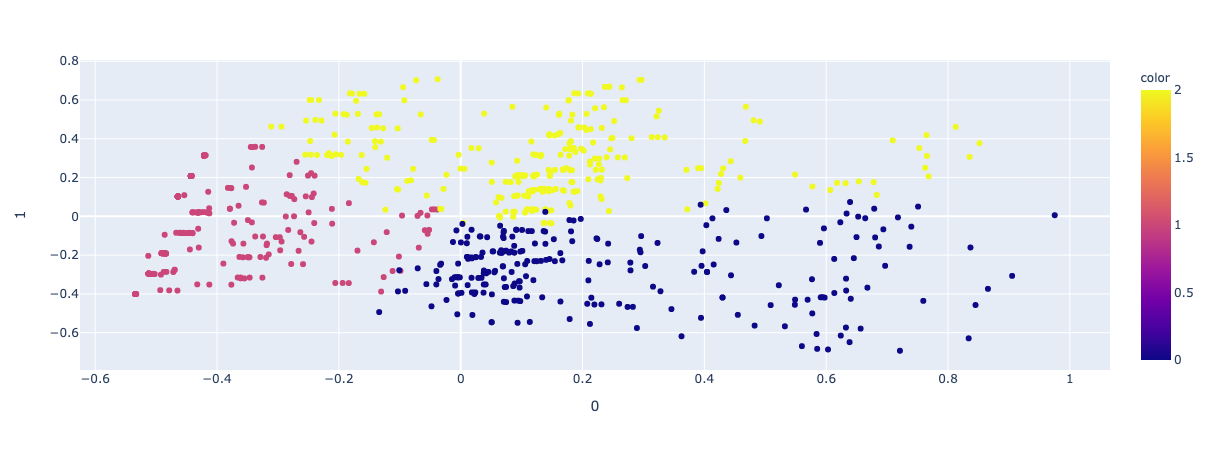

In [230]:
r = testdf[['income','age', 'years_with_bank','nbr_children','marital_status','saving_amount','credit_amount']]

th = MinMaxScaler().fit_transform(r)
columns = r.columns
dfsc = pd.DataFrame(th, columns=columns)

km = KMeans(n_clusters=3,
            n_init=30)
pca = PCA(n_components=3)
compsc = pca.fit_transform(dfsc)
ysckm = km.fit_predict(dfsc)




fig = px.scatter(compsc, x=0, y=1, color=ysckm)
fig.show()

In [231]:
dfsc['clusters'] = ysckm

dfsc0 = dfsc[dfsc['clusters'] == 0]
dfsc1 = dfsc[dfsc['clusters'] == 1]
dfsc2 = dfsc[dfsc['clusters'] == 2]

In [233]:
dfsc0.describe()

,income,age,years_with_bank,nbr_children,marital_status,saving_amount,credit_amount,clusters
count,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.0
mean,0.212768,0.421727,0.215575,0.305128,0.537037,0.032577,0.100470,0.0
std,0.162585,0.176821,0.188860,0.262162,0.281025,0.076201,0.157165,0.0
min,0.018737,0.105263,0.000000,0.000000,0.333333,0.000000,0.000000,0.0
25%,0.090386,0.263158,0.000000,0.000000,0.333333,0.000000,0.000000,0.0
50%,0.169652,0.394737,0.222222,0.300000,0.333333,0.004705,0.037746,0.0
75%,0.300958,0.526316,0.333333,0.400000,0.666667,0.033970,0.126316,0.0
max,0.986938,0.921053,0.777778,1.000000,1.000000,0.717499,0.968421,0.0


In [234]:
r['clusters'] = ysckm

r0 = r[r['clusters'] == 0]
r1 = r[r['clusters'] == 1]
r2 = r[r['clusters'] == 2]

<ipython-input-234-1367780be51c>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [236]:
r0.describe()

,income,age,years_with_bank,nbr_children,marital_status,saving_amount,credit_amount,clusters
count,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.0
mean,30671.995726,45.051282,1.940171,1.525641,2.611111,730.793462,954.469402,0.0
std,23437.812622,13.438364,1.699738,1.310810,0.843076,1709.397516,1493.070465,0.0
min,2701.000000,21.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.0
25%,13029.750000,33.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.0
50%,24456.500000,43.000000,2.000000,1.500000,2.000000,105.540000,358.590000,0.0
75%,43385.250000,53.000000,3.000000,2.000000,3.000000,762.035000,1200.000000,0.0
max,142274.000000,83.000000,7.000000,5.000000,4.000000,16095.500000,9200.000000,0.0


In [237]:
r1.describe()

,income,age,years_with_bank,nbr_children,marital_status,saving_amount,credit_amount,clusters
count,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.0
mean,11074.352459,24.885246,3.086066,0.036885,1.081967,611.187582,489.143934,1.0
std,15743.508243,12.814727,2.122961,0.188867,0.274879,1010.030637,798.868157,0.0
min,0.000000,13.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.0
25%,0.000000,15.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.0
50%,5638.500000,18.500000,3.000000,0.000000,1.000000,173.605000,0.000000,1.0
75%,17942.250000,32.000000,5.000000,0.000000,1.000000,768.287500,954.210000,1.0
max,111004.000000,80.000000,7.000000,1.000000,2.000000,7144.390000,5600.000000,1.0


In [238]:
r2.describe()

,income,age,years_with_bank,nbr_children,marital_status,saving_amount,credit_amount,clusters
count,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.0
mean,26388.985130,56.200743,6.364312,0.624535,1.973978,778.840632,787.470372,2.0
std,21868.397504,15.315727,1.810312,0.928564,0.687896,2054.680055,1239.655616,0.0
min,1039.000000,27.000000,2.000000,0.000000,1.000000,0.000000,0.000000,2.0
25%,10250.000000,46.000000,5.000000,0.000000,2.000000,0.000000,0.000000,2.0
50%,19863.000000,57.000000,6.000000,0.000000,2.000000,96.250000,334.290000,2.0
75%,35508.000000,66.000000,8.000000,1.000000,2.000000,748.730000,1000.000000,2.0
max,144157.000000,89.000000,9.000000,5.000000,4.000000,22432.780000,9500.000000,2.0


In [242]:
dfsc.columns[0:7].tolist()

['income',
 'age',
 'years_with_bank',
 'nbr_children',
 'marital_status',
 'saving_amount',
 'credit_amount']

In [248]:
dfsc1.describe()

,income,age,years_with_bank,nbr_children,marital_status,saving_amount,credit_amount,clusters
count,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.0
mean,0.076821,0.156385,0.342896,0.007377,0.027322,0.027245,0.051489,1.0
std,0.109211,0.168615,0.235885,0.037773,0.091626,0.045025,0.084091,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,0.000000,0.026316,0.111111,0.000000,0.000000,0.000000,0.000000,1.0
50%,0.039114,0.072368,0.333333,0.000000,0.000000,0.007739,0.000000,1.0
75%,0.124463,0.250000,0.555556,0.000000,0.000000,0.034248,0.100443,1.0
max,0.770022,0.881579,0.777778,0.200000,0.333333,0.318480,0.589474,1.0


In [243]:
e0 = dfsc0.mean().tolist()

e0.pop()

0.0

In [244]:
e1 = dfsc1.mean().tolist()

e1.pop()

1.0

In [245]:
e2 = dfsc2.mean().tolist()

e2.pop()

2.0

In [246]:
e1

[0.07682146866968928,
 0.1563848144952547,
 0.34289617486338847,
 0.007377049180327868,
 0.027322404371584688,
 0.027245289347428762,
 0.051488835202760985]

In [249]:
l = df.columns[0:7].tolist()

In [250]:
l = ['Income', 'Age', 'Years with the bank', 'Number of Children', 'Marital Status','Saving Amount','Credit Amount']

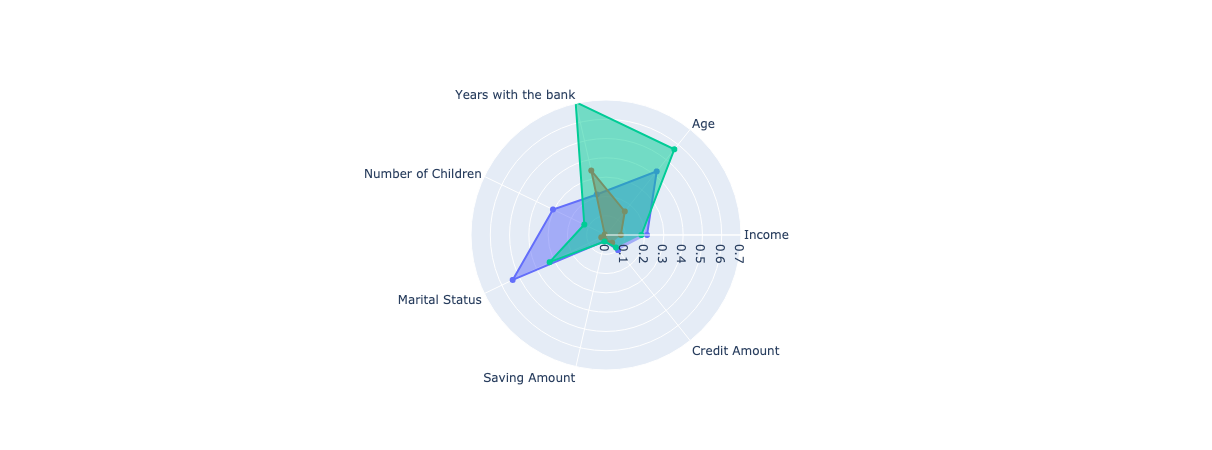

In [252]:
import plotly.graph_objects as go

categories = l

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=e0,
      theta=categories,
      fill='toself',
      name='Cluster 0'
))
fig.add_trace(go.Scatterpolar(
      r=e1,
      theta=categories,
      fill='toself',
      name='Cluster 1'
))

fig.add_trace(go.Scatterpolar(
      r=e2,
      theta=categories,
      fill='toself',
      name='Cluster 2'
))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 0.7]
    )),
  showlegend=False
)

fig.show()


## <span style="color:blue">This is what we did as our radar chart for part 2 using means of each category having added in saving amounts and debt amounts</span>.